What are the top three body parts most frequently represented in this dataset?
What are the top three body parts that are least frequently represented?


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [157]:
mainData=pd.read_csv("C:\\Users\\rober\\Downloads\\IndeedBIHomework (1) (1) (1) (1) (1) (1) (2)\\BIHomework\\NEISS2014.csv")
bodyParts=pd.read_csv("C:\\Users\\rober\\\Downloads\\IndeedBIHomework (1) (1) (1) (1) (1) (1) (2)\\BIHomework\\BodyParts.csv")

In [158]:
mainData.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narrative
0,141200216,10/23/14,63,99.704,M,21,Female,None listed,NaN,62,NaN,75,1,1,0,679,1807.0,21YOF LAYING ON THE COUCH AND ROLLED OFF TO TH...
1,140117851,1/4/14,63,81.576,M,62,Female,White,NaN,57,NaN,79,1,1,0,1807,115.0,62YOF TRIPPED OVER THE CORD FOR THE VACUUM CLE...
2,150144993,8/17/14,63,99.704,M,21,Female,None listed,NaN,57,NaN,83,1,0,0,1333,NaN,21YOF FELL OFF A SKATEBOARD AND FRACTURED FOOT
3,150230176,7/27/14,63,99.704,M,30,Female,None listed,NaN,64,NaN,79,1,1,0,4076,NaN,30YOF TRYING TO GET OUT OF BED AND FELT A POP ...
4,141220717,9/8/14,63,99.704,M,16,Male,None listed,NaN,57,NaN,82,1,0,0,1893,NaN,16YOM HAD HAND SLAMMED IN A DOOR FRACTURED HAND


In [156]:
bodyParts.head()

,BodyPart,Code
0,"Arm, lower",33
1,"Arm, upper",80
2,Ankle,37
3,Ear,94
4,Elbow,32


In [159]:
mergedFrame=pd.merge(mainData,bodyParts, how="left", left_on="body_part",right_on="Code") #join required to fetch body parts from codes in code file

In [46]:
len(mergedFrame) #original

65499

In [47]:
mergedFrame=mergedFrame[(mergedFrame['BodyPart']!='Not Recorded')] #removing the unrecorded entries

In [48]:
len(mergedFrame) #without not recorded

65109

In [49]:
groupedMerge=mergedFrame.groupby("BodyPart")['BodyPart'].agg(['count'])


In [50]:
groupedMerge.head()


,count
BodyPart,
25-50% of body,4
>50% of body,1422
Ankle,3781
"Arm, lower",2561
"Arm, upper",745


In [53]:
groupedMerge=groupedMerge.reset_index().rename(columns={'count': 'Bodypart Frequency'})

In [54]:
groupedMerge

,index,BodyPart,Bodypart Frequency
0,0,25-50% of body,4
1,1,>50% of body,1422
2,2,Ankle,3781
3,3,"Arm, lower",2561
4,4,"Arm, upper",745
5,5,Ear,782
6,6,Elbow,1612
7,7,Eyeball,847
8,8,Face,5786
9,9,Finger,5783


In [55]:
groupedMerge = groupedMerge[['index', 'BodyPart', 'Bodypart Frequency']].copy() #remove extra column

In [57]:
groupedMerge

,index,BodyPart,Bodypart Frequency
0,0,25-50% of body,4
1,1,>50% of body,1422
2,2,Ankle,3781
3,3,"Arm, lower",2561
4,4,"Arm, upper",745
5,5,Ear,782
6,6,Elbow,1612
7,7,Eyeball,847
8,8,Face,5786
9,9,Finger,5783


In [58]:
sortedGroup=groupedMerge.sort_values(['Bodypart Frequency'],ascending=False)

In [59]:
sortedGroup.head()


,index,BodyPart,Bodypart Frequency
12,12,Head,9891
8,8,Face,5786
9,9,Finger,5783
22,22,"Trunk, lower",5717
23,23,"Trunk, upper",3868


In [61]:
sortedGroup=sortedGroup.reset_index(drop=True)

In [63]:
sortedGroup

,index,BodyPart,Bodypart Frequency
0,12,Head,9891
1,8,Face,5786
2,9,Finger,5783
3,22,"Trunk, lower",5717
4,23,"Trunk, upper",3868
5,2,Ankle,3781
6,14,Knee,3616
7,11,Hand,3369
8,10,Foot,3090
9,20,Shoulder,2675


In [65]:
top3=sortedGroup.head(3)

In [71]:
top3 #this gives the top 3 body areas 

,index,BodyPart,Bodypart Frequency
0,12,Head,9891
1,8,Face,5786
2,9,Finger,5783


In [72]:
bottom3=sortedGroup.tail(3)

In [73]:
bottom3 #this gives the bottom 3 entries for body part

,index,BodyPart,Bodypart Frequency
22,13,Internal,549
23,19,Pubic region,286
24,0,25-50% of body,4


In [134]:
top5=sortedGroup.head()
bottom5=sortedGroup.tail()

In [ ]:
%matplotlib inline

In [ ]:
top5.plot(kind='pie', y='Bodypart Frequency', title='Top5 BodyParts', explode=explode, labels = labels, 
        autopct='%1.1f%%', shadow=True, startangle=140, fontsize=10, legend=False, colors = colours)
plt.axis('equal')
plt.show()

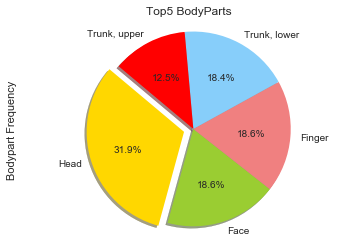

In [149]:
explode = (0.1, 0, 0, 0,0)
labels = top5['BodyPart']
colours = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']


top5.plot(kind='pie', y='Bodypart Frequency', title='Top5 BodyParts', explode=explode, labels = labels, 
        autopct='%1.1f%%', shadow=True, startangle=140, fontsize=10, legend=False, colors = colours)
plt.axis('equal')
plt.show()

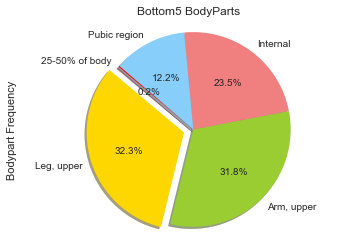

In [150]:
explode = (0.1, 0, 0, 0,0)
labels = bottom5['BodyPart']
colours = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']


bottom5.plot(kind='pie', y='Bodypart Frequency', title='Bottom5 BodyParts', explode=explode, labels = labels, 
        autopct='%1.1f%%', shadow=True, startangle=140, fontsize=10, legend=False, colors = colours)
plt.axis('equal')
plt.show()